In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

from numbers_parser import Document
from os import path as path
import collections

import Dumbleplot as dp

#### Import Data

In [2]:
spells = dp.Data() 

#### Cast: construct dataset

In [3]:
pathtofile = "/Users/scibook/Eigen/PhD/Experiments/LLPS/20240425 cell extract spin column concentration/Data"
filename = "ionic_strength_vs_extract.numbers"
get_data_from_sheet= "Sheet 1"
table = "in-chip"

spellbook1 = dp.DataImport(pathtofile, filename)
spellbook1.import_data(get_data_from_sheet, table)
df = spellbook1.df
print(df)

x_data = ["ionic strength [mM]"]
y_data = ["extract in chip"]
errorbars = None  # None or list: ["errorbar1"]
until_column = 10

spells.get_data(until_column, y_data, x_data, df)
spells.get_errors(until_column, errorbars, df)

     cf  extract in chip  ionic strength [mM]
0   1.0              1.0                 99.0
1   1.1              1.1                108.9
2   1.2              1.2                118.8
3   1.3              1.3                128.7
4   1.4              1.4                138.6
5   1.5              1.5                148.5
6   1.6              1.6                158.4
7   1.7              1.7                168.3
8   1.8              1.8                178.2
9   1.9              1.9                188.1
10  2.0              2.0                198.0


In [4]:
# copy for each dataset you want to display
data_properties = {
    "marker" : "o",  # alternatives: "x", "^", "v", "s", "o"
    "linestyle" : "solid",  # alternatives: "solid", "dotted", "dashdot", "dashed" or "" for no line
    "color": None,  # "None" for default colors, alternative: hexcolors or names (hence "green")
    "regression": False  # None for no regression, "True" for linear regression
}
spells.plot_properties.append(data_properties)

#### Cast: construct dataset

In [5]:
pathtofile = "/Users/scibook/Eigen/PhD/Experiments/LLPS/20240425 cell extract spin column concentration/Data"
filename = "ionic_strength_vs_extract.numbers"
get_data_from_sheet= "Sheet 3"
table = "spin-column1"

spellbook1 = dp.DataImport(pathtofile, filename)
spellbook1.import_data(get_data_from_sheet, table)
df = spellbook1.df
print(df)

x_data = ["ionic strength [mM]"]
y_data = ["extract spin column theo"]
errorbars = None  # None or list: ["errorbar1"]
until_column = 9

spells.get_data(until_column, y_data, x_data, df)
spells.get_errors(until_column, errorbars, df)

             None  volume in column  extract spin column theo  \
0              t0             400.0                  1.000000   
1  centrifugation             295.0                  1.355932   
2         fill-up             375.0                  1.066667   
3  centrifugation             270.0                  1.481481   
4         fill-up             350.0                  1.142857   
5  centrifugation             245.0                  1.632653   
6         fill-up             325.0                  1.230769   
7  centrifugation             220.0                  1.818182   
8         fill-up             300.0                  1.333333   
9  centrifugation             195.0                  2.051282   

   ionic strength [mM]  
0            99.000000  
1            99.000000  
2           131.213333  
3           131.213333  
4           158.364571  
5           158.364571  
6           180.920985  
7           180.920985  
8           199.342055  
9           199.342055  


In [6]:
# copy for each dataset you want to display
data_properties = {
    "marker" : "s",  # alternatives: "x", "^", "v", "s", "o"
    "linestyle" : "solid",  # alternatives: "solid", "dotted", "dashdot", "dashed" or "" for no line
    "color": None,  # "None" for default colors, alternative: hexcolors or names (hence "green")
    "regression": False  # None for no regression, "True" for linear regression
}
spells.plot_properties.append(data_properties)

#### Does Data magic

In [7]:
# set idx to True if you have enter idx values for x- or y-data
spells.construct_dict()
#spells.delete_nans()
#spells.get_errorbar(errorbars)

#### Cast: specify the properties of the general plot

In [8]:
# specify the properties of the general plot
plot_properties = {
    "figname" : "concentration_pathways3",
    "formats" : ["png", "svg"],  # "svg", "png", "jpeg", "bmp"
    "xlabel" : "ionic strength [mM]",
    "ylabel" : "extract concentration factor [AU]",
    "x-range" : [None, None],  # [None, None] for default, otherwise [startvalue, endvalue]
    "y-range" : [None, None],  
    "x-ticks" : None,  # specify number of labeld major ticks on each axis, None is automode
    "y-ticks" : None,
    "x-minor" : 2,  # specify number of minor ticks between major ticks, 2 or 5 is best, None is automode
    "y-minor" : 2,
    "xaxis-type": "lin",  # can be set to "lin" or "log"
    "yaxis-type": "lin",
    "fontsizefactor" : 1.2
}

#### Accio Plot

Accio plot!
｡ﾟ.
ଘ(੭චᴗච)━☆ﾟ.*･
*｡ﾟ
 . 


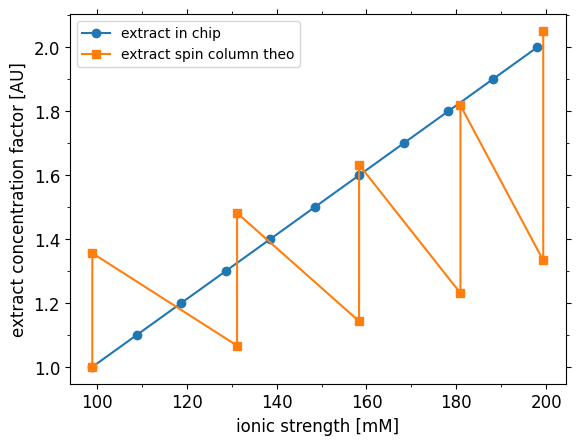

In [9]:
# main plot; all in one
hp = dp.Plotter(plot_properties)
hp.set_limits()
hp.set_major_ticks()
hp.cast_magic()

fig = plt.figure()
ax = fig.add_subplot(111)

# plot datasets
for dataset_nr in spells.dataset:
    properties = spells.dataset[dataset_nr]
    ax.errorbar(properties["xdata"], properties["ydata"], xerr=None, yerr=properties["errorbars"], capsize=5,
                marker = properties["marker"], linestyle = properties["linestyle"], color = properties["color"],
                label = properties["name"])

    # check for regression
    if properties["regression"] is True:
        reg = dp.Regression()
        xdf = pd.DataFrame(properties["xdata"]) #xdf was originally dataset["xdata"] and this line was not here
        ydf = pd.DataFrame(properties["data"]) # problem is only because delete_nans generates list, but if they are changed to df, some more errors occure. URGENT
        y_pred, m, c = reg.linreg(xdf.values.reshape(-1, 1), ydf.values, properties["name"], do_linreg = True)
        ax.plot(xdf, y_pred, color = properties["color"]) # xdf = spells.ydata[0]["xdata"]


# adjust plot
ax.set_xlabel(hp.pp["xlabel"])
ax.set_ylabel(hp.pp["ylabel"])
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.set_xlim(hp.pp["x-range"])
ax.set_ylim(hp.pp["y-range"])

xt, yt = hp.set_lin_log()
ax.set_xscale(xt)
ax.set_yscale(yt)

if hp.pp["xtick_number"] is not None:
    ax.xaxis.set_major_locator(hp.pp["xtick_number"])
if hp.pp["ytick_number"] is not None:
    ax.yaxis.set_major_locator(hp.pp["ytick_number"])

xminor, yminor = hp.minor_locator()
if hp.pp["xaxis-type"] != "log":
    ax.xaxis.set_minor_locator(AutoMinorLocator(xminor))
if hp.pp["yaxis-type"] != "log":
    ax.yaxis.set_minor_locator(AutoMinorLocator(yminor))

ax.yaxis.label.set_size(10*hp.pp["fontsizefactor"])
ax.xaxis.label.set_size(10*hp.pp["fontsizefactor"])
ax.tick_params(axis="x", labelsize = 10*hp.pp["fontsizefactor"])
ax.tick_params(axis="y", labelsize = 10*hp.pp["fontsizefactor"])


##############
#Add user defined stuff here
#ax.axvline(x=375, label="Emission 375 nm", color="red")
#ax.axvspan(370, 380, alpha=0.2, color='red')
##############



legend = ax.legend()

#### Save figure

In [10]:
savepath = path.join(pathtofile, plot_properties["figname"])
for file_format in plot_properties["formats"]:
    fig.savefig(savepath + '.%s' % file_format, dpi=600, format=file_format)